# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover :

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Puttin it all together!

In [1]:
import numpy as np

## 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Get the data ready
import pandas as pd
heart_disease=pd.read_csv("./data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop("target",axis=1)

# Create Y (labels)
y = heart_disease["target"]

In [4]:
import warnings
# warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

In [5]:
# 2. Choose the right model and hyperparamaters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importli

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.2 (default, Apr 14 2020, 19:01:40) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Adak\Desktop\sample_project_1\env\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
       pip: 20.0.2
setuptools: 46.1.3.post20200330
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: None
    pandas: 1.0.3
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


In [8]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
# Make a prediction (Wrong version!)
y_pwrong=clf.predict(np.array([1,2,3]))
y_pwrong

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Make a prediction
y_preds=clf.predict(X_test)
y_preds

In [ ]:
y_test

In [ ]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

In [ ]:
confusion_matrix(y_test,y_preds)

In [ ]:
accuracy_score(y_test,y_preds)

In [ ]:
# 5. Improve a model
# Try diffrent amount of n_estimators
np.random.seed(42)
for i in range(10,110,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set:{clf.score(X_test,y_test)*100:.2f}%")
    print("")

In [ ]:
# 6. Sace a model and load it
import pickle

pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [ ]:
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

## What we're going to cover:

In [ ]:
# Let's listify the contents
what_were_covering=[
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"
]

In [ ]:
what_were_covering

In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features and labels(usually `X` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding )

In [ ]:
heart_disease.head()

In [ ]:
X = heart_disease.drop("target",axis=1)
X.head()

In [ ]:
y=heart_disease["target"]
y.head()

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
X.shape[0]*0.8

In [ ]:
242+61

### 1.1 Make sure it's all numerical

In [ ]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

In [ ]:
len(car_sales)

In [ ]:
car_sales.dtypes

In [ ]:
# Split into X/y
X=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

# Split into training and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X


In [ ]:
X

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

In [ ]:
# let's refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

model.fit(X_train,y_train)

In [ ]:
X.head()

In [ ]:
model.score(X_test,y_test)

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [ ]:
# Import car sales missing data
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Create X & y
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [ ]:
# Let's try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

In [ ]:
car_sales_missing

In [ ]:
car_sales_missing["Doors"].value_counts()

#### Option 1: Fill missing data with Pandas

In [ ]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True)

In [ ]:
# Check our dataframe again
car_sales_missing.isna().sum()

In [ ]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X

### Option 2: Fill missing values with Scikit-Learn

In [ ]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

In [ ]:
# Split into X & y
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [ ]:
X.isna().sum()

In [ ]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

# Define columns
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

# Transform the data 
filled_X=imputer.fit_transform(X)
filled_X

In [ ]:
car_sales_filled=pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

In [ ]:
car_sales_filled.isna().sum()

In [ ]:
len(car_sales_filled)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X

In [ ]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
len(car_sales_filled),len(car_sales)

In [ ]:
what_were_covering

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

Step 1 - Check the Scikit-Learn machine learning map... 
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

In [ ]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston=load_boston()
boston

In [ ]:
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

In [ ]:
# How many samples?
len(boston_df)

In [ ]:
# Let's try the Ridge Regression Model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate Ridge model
model=Ridge()
model.fit(X_train,y_train)

# Check the score of the Ridge model on test data
model.score(X_test,y_test)

How do we improve this score?

What if Ridge wasn't working?

Let's refer back to the map...
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate Random Forest Regressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test,y_test)

In [ ]:
# Check the Ridge model again
model.score(X_test,y_test)

### 2.2 Choosing and estimator for a classification problem

Let's go to the map...
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease.head()

In [ ]:
len(heart_disease)

Consulting the map and it says to try `LinearSVC`.

In [ ]:
# import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC
clf=LinearSVC(max_iter=10000)
clf.fit(X_train,y_train)

# Evaluate the LinearSVC
clf.score(X_test,y_test)

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test,y_test)

Tidbit:
    1. If you have structured data , use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

In [ ]:
heart_disease

In [ ]:
what_were_covering

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [ ]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train,y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(X_test,y_test)

In [ ]:
X.head()

In [ ]:
y.head()

### 3.2 Make Predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [ ]:
# Use a trained model to make predictions
clf.predict(np.array([1,2,3,4,5])) # this doesn't work...

In [ ]:
X_test.head()

In [ ]:
clf.predict(X_test)

In [ ]:
np.array([y_test])

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

Make predictions with `predict_proba()`

In [ ]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

In [ ]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

In [ ]:
X_test[:5]

In [ ]:
heart_disease["target"].value_counts()

`predict()` can also be used for regression models

In [ ]:
boston_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

# Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate and fit model
model=RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# Make predictions 
y_preds=model.predict(X_test)

In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

In [ ]:
what_were_covering

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with `score` method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

Let's do the same but for regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

# Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate and fit model
model=RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
model.score(X_train,y_train)

### 4.2 Evaluating a model using the `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train);

In [ ]:
clf.score(X_test,y_test)

In [ ]:
cross_val_score(clf,X,y,cv=5)

In [ ]:
cross_val_score(clf,X,y,cv=10)

In [ ]:
np.random.seed(42)

# Single training and test split score
clf_single_score=clf.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))

# Compare the two
clf_single_score,clf_cross_val_score

In [ ]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

In [ ]:
# Scoring parameter set to None by default
cross_val_score(clf,X,y,cv=5,scoring=None)

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [ ]:
heart_disease.head()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)
cross_val_score=cross_val_score(clf,X,y,cv=5)

In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [ ]:
# Create X_test...
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train,y_train)
# Make predictions with probabilites
y_probs=clf.predict_proba(X_test)

y_probs[:10],len(y_probs)

In [ ]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

In [ ]:
# Calculate fpr,tpr and tresholds
fpr,tpr,tresholds=roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

In [ ]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # Plot linewith no predictive power(baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    # Customize the plot 
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Charasteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

In [ ]:
# Plot perfect ROC curve and AUC score
fpr,tpr,tresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict .

In essence , giving you an idea of where the model is getting confused.

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)

confusion_matrix(y_test,y_preds)

In [ ]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

In [ ]:
22+7+8+24

In [ ]:
len(y_preds)

In [ ]:
len(X_test)

In [ ]:
# How to install a conda package into the current environment from a Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

In [ ]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

In [ ]:
def plot_conf_mat(conf_mat):
    """
    Plots confusion matrix using Seaborn's heatmap().
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,
                  annot=True, # Annotate the boxes with conf_mat info
                  cbar=False)
    plt.xlabel("True label");
    plt.ylabel("Predicted label");
    
    # Not for new versions
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
#     bottom,top=ax.get_ylim()
#     ax.set_ylim(bottom+0.5,top-0.5);
    
plot_conf_mat(conf_mat)

In [ ]:
# SciKit Learn Way to plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X,y);

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

In [ ]:
# Where precision and recall become valuable
disease_true=np.zeros(10000)
disease_true[0]=1 # only one positive case

disease_preds=np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

To summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced(e.g same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficent of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train);

In [ ]:
model.score(X_test,y_test)

In [ ]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())

In [ ]:
y_test.mean()

In [ ]:
y_test_mean

In [ ]:
r2_score(y_test,y_test_mean)

In [ ]:
r2_score(y_test,y_test)

**Mean absolute error (MAE)**

MAE is the average of the absolute diffrences between predictions and actual values . It gives you an idea of how wrong your model predictions are.

In [ ]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)
mae

In [ ]:
df=pd.DataFrame(data={"actual values":y_test,
                     "predicted values":y_preds})
df["diffrences"]=df["predicted values"]-df["actual values"]
df

**Mean squared error**

In [ ]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds=model.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
mse

In [ ]:
# Calculate MSE By hand
squared=np.square(df["diffrences"])
squared.mean()

### 4.2.3 Finally using the `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)

In [ ]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

In [ ]:
# Cross-Validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

In [ ]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

In [ ]:
# Precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
np.mean(cv_precision)

In [ ]:
# Recall
cv_recall=cross_val_score(clf,X,y,scoring="recall")
np.mean(cv_recall)

In [ ]:
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
np.mean(cv_f1)

How about our regression model ?

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df["target"]

model=RandomForestRegressor(n_estimators=100)

In [ ]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring=None)
np.mean(cv_r2)

In [ ]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring="r2")
cv_r2

In [ ]:
# Mean absolute error
cv_mae=cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

In [ ]:
# Mean squared error
cv_mse=cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
np.mcv_mse

### 4.3 Using diffrent evaluation metrics as Scikit-Learn functions

**Classification evaluation functions

In [17]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

# Make some predictions
y_preds=clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test,y_preds)*100:.2f}%")
print(f"F1: {f1_score(y_test,y_preds)*100:.2f}%")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


**Regression evaluation functions**

In [18]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])

np.random.seed(42)
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

y_preds=model.predict(X_test)

print("Regression model metrics on the test set")
print(f"R^2:{r2_score(y_test,y_preds)}")
print(f"MAE:{mean_absolute_error(y_test,y_preds)}")
print(f"MSE:{mean_squared_error(y_test,y_preds)}")

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


Regression model metrics on the test set
R^2:0.8739690141174031
MAE:2.1226372549019623
MSE:9.242328990196082


In [ ]:
what_were_covering=[
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"
]

In [ ]:
what_were_covering

## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data? 

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters

* Parameter = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve it's ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [ ]:
clf.get_params()

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training , validation and test

In [ ]:
clf.get_params()

We're going ro try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [19]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                "precision":round(precision,2),
                "recall":round(recall,2),
                "f1":round(f1,2)}
    print(f"Accuracy: {accuracy*100:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [23]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled=heart_disease.sample(frac=1)

# Split into X & y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split the data into train , validation & test sets
train_split=round(0.7*len(heart_disease_shuffled))
valid_split=round(train_split+0.15*len(heart_disease_shuffled))
X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)

# Make baseline predictions
y_preds=clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

Accuracy: 80.00
Precision: 0.77
Recall: 0.92
F1 score: 0.84


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [24]:
np.random.seed(42)

# Create a second classifier with diffrent hyperparameters
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

# Make predictions with diffrent hyperparameters
y_preds_2=clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)
clf_2_metrics

Accuracy: 82.22
Precision: 0.84
Recall: 0.84
F1 score: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [25]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators":[10,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],
      "max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]}

np.random.seed(42)

# Split into X & y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10, # number of models to try
                         cv=5,
                         verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.5s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   41.7s finished


In [26]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [27]:
# Make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Accuracy: 81.97
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [28]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [31]:
grid_2={'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [32]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)


# Split into X & y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf=GridSearchCV(estimator=clf,
                         param_grid=grid_2,
                         cv=5,
                         verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   38.1s finished


In [33]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [35]:
gs_y_preds=gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Accuracy: 78.69
Precision: 0.74
Recall: 0.82
F1 score: 0.78


Let's compare our diffrent models metrics.

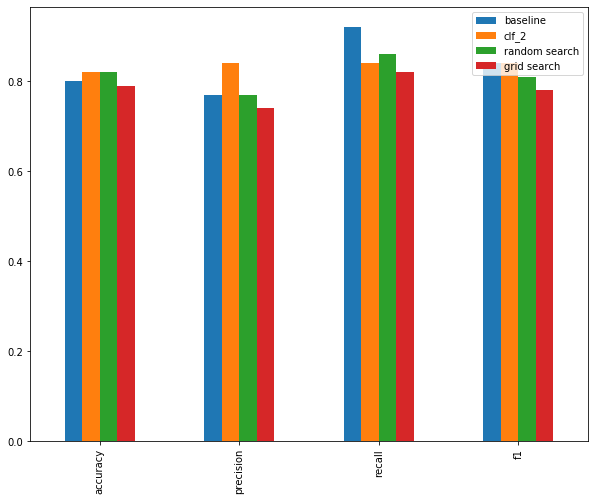

In [38]:
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                             "clf_2":clf_2_metrics,
                             "random search":rs_metrics,
                             "grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

In [39]:
what_were_covering=[
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"
]

In [40]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [41]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))

<ipython-input-41-adcfea1a7418>:4: ResourceWarning: unclosed file <_io.BufferedWriter name='gs_random_forest_model_1.pkl'>
  pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))


In [42]:
# Load a saved model

loaded_pickle_model=pickle.load(open("gs_random_forest_model_1.pkl","rb"))

<ipython-input-42-fb089588d963>:2: ResourceWarning: unclosed file <_io.BufferedReader name='gs_random_forest_model_1.pkl'>
  loaded_pickle_model=pickle.load(open("gs_random_forest_model_1.pkl","rb"))


In [48]:
# Reseting our X and y  
np.random.seed(42)


# Split into X & y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [44]:
# Make some predictions
pickle_y_preds=loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Accuracy: 78.69
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [45]:
from joblib import dump,load

# Save model to file
dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [46]:
# Import a saved joblib model
loaded_job_model=load(filename="gs_random_forest_model_1.joblib")

In [50]:
# Make and evaluate joblib predictions
joblib_y_preds=loaded_job_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Accuracy: 78.69
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [51]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 7. Putting it all together!

In [52]:
data=pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [53]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [54]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [55]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data=pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

# Define diffrent features and transformer pipeline
caterogical_features=["Make","Colour"]
caterogical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_feature=["Doors"]
door_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values,then convert to numbers)
preprocessor=ColumnTransformer(
            transformers=[
                ("cat",caterogical_transformer,caterogical_features),
                ("door",door_transformer,door_feature),
                ("num",numeric_transformer,numeric_features)
            ])

# Creating a preprocessing and modeling pipeline
model=Pipeline(steps=[("preprocessor",preprocessor),
                     ("model",RandomForestRegressor())])

# Split data
X=data.drop("Price",axis=1)
y=data["Price"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.

In [56]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid={
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]
}

gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.6s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.6s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.6s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [57]:
gs_model.score(X_test,y_test)

0.3339554263158365

In [58]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']